In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

from fitter import Fitter
from scipy.stats import exponnorm, erlang

from skmultiflow.drift_detection import PageHinkley
from driftwatch import GreedyKS, IksReservoir, ReservoirSampling, LallDDSketch

In [4]:
def get_methods(ref_distrib, num_bins, min_instances):
    ph = PageHinkley(min_instances=min_instances)
    gks = GreedyKS(dist=ref_distrib, m=num_bins, min_instances=min_instances)#, drift_threshold=0.000001)
    rs = ReservoirSampling(num_bins, ref_distrib)


    methods = {
        "page hinkley" : ph,
        "greedyKS" : gks,
        "reservoir sampling" : rs,
        
    }
    methods_drifts = {
    "page hinkley" : [],
    "greedyKS" : [],
    "reservoir sampling" : [],

    }

    methods_times = {
        "page hinkley" : 0,
        "greedyKS" : 0,
        "reservoir sampling" : 0,

    }

    methods_colors = {
        "page hinkley" : 'r',
        "greedyKS" : 'g',
        "reservoir sampling" : 'b',

    }

    return methods, methods_drifts, methods_times, methods_colors

In [5]:
def load_data(column):
    stream = []
    days = range(1, 23) # 1, 32
    months = range(1, 2) #1, 3
    for month in months:
        month_2_digits = '{month:02}'.format(month=month)
        path = './COVID19_Tweets_Dataset_2020/Summary_Sentiment/2020_' + month_2_digits + '/'

        for day in days:
            if month == 2 and day > 29:
                continue
            if month == 1 and day < 22:
                continue

            for hour in range(24):
                file_name = path + f'2020_{month_2_digits}_' + '{day:02}'.format(day=day) + '_{hour:02}'.format(hour=hour) + '_Summary_Sentiment.csv'
                stream.append(pd.read_csv(file_name)[column])

    return pd.concat(stream, ignore_index=True)


stream_ln = load_data('Logits_Negative')
stream_lp = load_data('Logits_Positive')
stream_lt = load_data('Logits_Neutral')

Fitting 110 distributions:  74%|███████▎  | 81/110 [02:33<00:36,  1.26s/it]SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitting 110 distributions:  79%|███████▉  | 87/110 [02:46<00:44,  1.92s/it]/home/thalis/repositories/TCC/venv/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED rdist distribution (taking more than 30 seconds)
Fitting 110 distributions:  84%|███

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gennorm,0.561519,597.836729,-402450.655683,inf,0.025493,6.033894e-21
exponweib,0.562898,605.857331,-402350.980210,inf,0.027563,2.055205e-24
beta,0.563204,618.355525,-402331.254358,inf,0.022971,4.373689e-17
weibull_min,0.571336,576.598393,-401820.924814,inf,0.027168,9.903171e-24
exponpow,0.571995,663.657968,-401779.022993,inf,0.036536,1.418609e-42


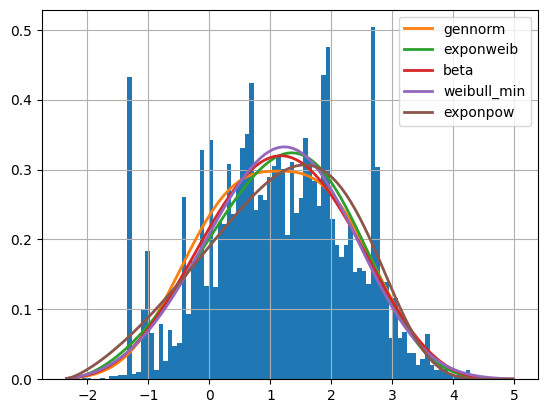

In [6]:
f = Fitter(stream_ln)#, distributions=['exponnorm', 'fatiguelife', 'moyal', 'alpha', 'erlang', 'norm', 'expon'])
f.fit()
f.summary()

Fitting 110 distributions:   3%|▎         | 3/110 [00:30<19:54, 11.16s/it]SKIPPED beta distribution (taking more than 30 seconds)
SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED alpha distribution (taking more than 30 seconds)
Fitting 110 distributions:   5%|▍         | 5/110 [00:30<08:31,  4.87s/it]SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
Fitting 110 distributions:  15%|█▍        | 16/110 [01:00<05:02,  3.22s/it]SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
Fitting 110 distributions:  22%|██▏       | 24/110 [01:30<05:32,  3.86s/it]SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED foldcauchy distribution (taking more than 30 seconds)
Fitting 110 distributions:  29%|██▉       | 32/110 [02:00<05:19,  4.09s/it]SKIPPED genhalflogistic distribution (taking more than 30 seconds)
SKIPPED genhyperbolic distribution

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
erlang,0.441516,1024.806400,-411186.248922,inf,0.044587,3.322771e-63
gamma,0.441517,1024.796491,-411186.122953,inf,0.044591,3.241456e-63
kstwobign,0.496305,1307.122783,-406946.648216,inf,0.058120,4.014193e-107
moyal,0.510042,918.556077,-405954.662145,inf,0.053456,1.123607e-90
rayleigh,0.525499,1585.222490,-404869.927628,inf,0.079124,2.670511e-198


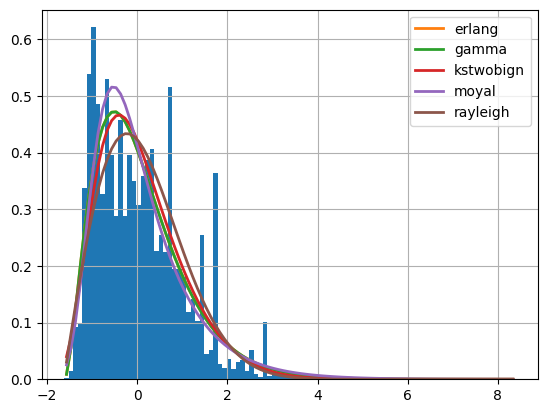

In [7]:
f = Fitter(stream_lp)
f.fit()
f.summary()

Fitting 110 distributions:   1%|          | 1/110 [00:01<01:54,  1.05s/it]SKIPPED anglit distribution (taking more than 30 seconds)
SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)
Fitting 110 distributions:   2%|▏         | 2/110 [00:31<32:33, 18.09s/it]SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
Fitting 110 distributions:   5%|▍         | 5/110 [00:31<09:03,  5.17s/it]SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
Fitting 110 distributions:   9%|▉         | 10/110 [00:47<03:19,  2.00s/it]SKIPPED burr12 distribution (taking more than 30 seconds)
SKIPPED chi distribution (taking more than 30 seconds)
Fitting 110 distributions:  11%|█         | 12/110 [01:01<08:28,  5.19s/it]SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
hypsecant,1.186461,568.901729,-375280.962720,inf,0.047233,7.047912e-71
gumbel_r,1.217038,510.736396,-374356.459070,inf,0.040421,5.118104e-52
logistic,1.236225,587.435660,-373788.136188,inf,0.049736,1.510452e-78
maxwell,1.317007,581.750982,-371488.279386,inf,0.053526,6.513683e-91
laplace,1.317120,549.858393,-371485.175761,inf,0.045277,3.658385e-65


/home/thalis/repositories/TCC/venv/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


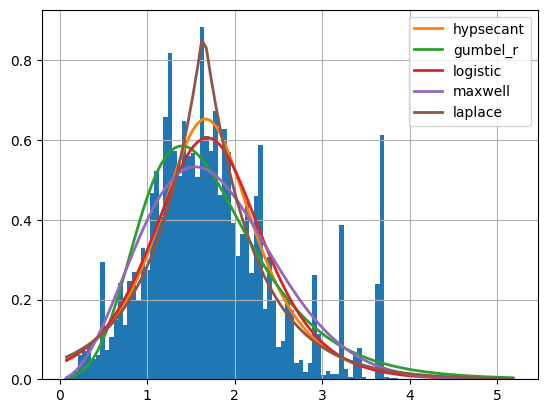

In [8]:
f = Fitter(stream_lt)
f.fit()
f.summary()
# f.get_best()

In [9]:
distribution = exponnorm(5.025553216466441, loc=-1.1327249541070226, scale=0.2032867510140243)
# distribution = exponnorm(f.fitted_param['exponnorm'][0], f.fitted_param['exponnorm'][1], f.fitted_param['exponnorm'][2])

methods, methods_drifts, methods_times, methods_colors = get_methods(distribution, num_bins=10**3, min_instances=0)
         
for m in methods:
    start = time.time()
    for i, x in enumerate(stream_ln):
        methods[m].add_element(abs(x))
        if methods[m].detected_change():
            methods_drifts[m].append(i)
            methods[m].reset()
    methods_times[m] = methods_times[m] + time.time() - start

print('Number of tweets processed: ', len(stream_ln))

Number of tweets processed:  36333


In [10]:
methods_times

{'page hinkley': 0.25894808769226074,
 'greedyKS': 64.47171211242676,
 'reservoir sampling': 519.1544232368469}

In [11]:
print('Reservoir S ', len(methods_drifts['reservoir sampling']))
print('GreedyKS ', len(methods_drifts['greedyKS']))
print('Page hinkley ', len(methods_drifts['page hinkley']))


Reservoir S  9793
GreedyKS  9769
Page hinkley  14


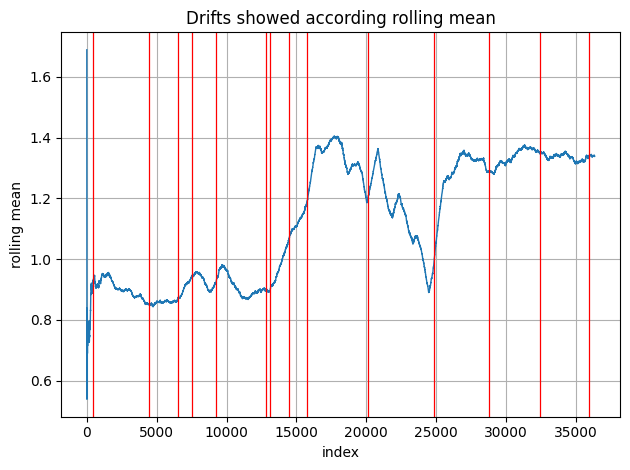

In [13]:
rolling_mean = stream_ln.rolling(len(stream_ln)//10, min_periods=0).mean()

# plt.figure(figsize=(5,3.5))
plt.plot(rolling_mean, linewidth=1)

for m in methods_drifts:
    if m != 'page hinkley':
        continue
    for d in methods_drifts[m]:
        plt.axvline(x = d, color = methods_colors[m], linewidth=0.9, label=m)




plt.title('Drifts showed according rolling mean')
# plt.legend()
plt.xlabel('index')
plt.ylabel('rolling mean')
plt.grid(True)
plt.tight_layout()
plt.show()